In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from psifr import fr
import swarmbar as sb

from cymr import cmr
from dcmr import framework
from dcmr import figures
from dcmr import task
from dcmr import reports

res_dir = Path(os.environ['CDCFR_RESULTS'])
fit_dir = Path(os.environ['CDCFR_FITS']) / 'switchboard'
fig_dir = Path(os.environ['CDCFR_FIGURES']) / 'plots'

data_file = res_dir / 'data.csv'
patterns_file = res_dir / 'patterns.hdf5'

fig_dir.mkdir(exist_ok=True, parents=True)
figures.set_style()
%matplotlib inline

In [2]:
patterns = cmr.load_patterns(patterns_file)
data = pd.read_csv(data_file).astype({'item_index': 'Int64'})
data.head()

,subject,session,list,trial_type,position,item,category,distractor,item_index
0,201,1,1,study,1,MASCARA,obj,0.0,646
1,201,1,1,study,2,GOLF CLUB,obj,0.0,606
2,201,1,1,study,3,KEYCHAIN,obj,0.0,626
3,201,1,1,study,4,LOS ANGELES,loc,0.0,370
4,201,1,1,study,5,GETTYSBURG,loc,0.0,325


In [3]:
models = [
    'cmrsit_sem-split_cue-focused_dis-cat_sub-list',
]
model_names = [
    'DCMR-Disrupt',
]
data = framework.read_model_sims(data_file, fit_dir, models, model_names, data_first=True)
data['Distraction (s)'] = data['distractor'].astype(float)
data.head()

subject  list         item  input  output  study  recall  \
source trial                                                             
Data   0          201     1      MASCARA      1    <NA>   True   False   
       1          201     1    GOLF CLUB      2    <NA>   True   False   
       2          201     1     KEYCHAIN      3    <NA>   True   False   
       3          201     1  LOS ANGELES      4    <NA>   True   False   
       4          201     1   GETTYSBURG      5       9   True    True   

              repeat  intrusion  session  ...  category  block n_block  \
source trial                              ...                            
Data   0           0      False        1  ...       obj   <NA>    <NA>   
       1           0      False        1  ...       obj   <NA>    <NA>   
       2           0      False        1  ...       obj   <NA>    <NA>   
       3           0      False        1  ...       loc   <NA>    <NA>   
       4           0      False        1  ...       loc   <NA>    <NA>   

              block_pos  block_len  curr  prev  next  base Distraction (s)  
source trial                                                                
Data   0           <NA>       <NA>  <NA>  <NA>  <NA>  <NA>             0.0  
       1           <NA>       <NA>  <NA>  <NA>  <NA>  <NA>             0.0  
       2           <NA>       <NA>  <NA>  <NA>  <NA>  <NA>             0.0  
       3           <NA>       <NA>  <NA>  <NA>  <NA>  <NA>             0.0  
       4           <NA>       <NA>  <NA>  <NA>  <NA>  <NA>             0.0  

[5 rows x 22 columns]

In [4]:
curve = sns.color_palette(
    'ch:rot=-.5, light=.6, dark=.3, gamma=1', n_colors=3
)
curve

[(0.44163916703794076, 0.6914342033666265, 0.5414714890673176),
 (0.27424883716016524, 0.5352555384607786, 0.4809527643729599),
 (0.17051215858853222, 0.344636926092434, 0.3959064384004337)]

In [5]:
dark = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.6', n_colors=3
)
dark

[(0.725301473503126, 0.8645990769601404, 0.7363315007817791),
 (0.5016677447743987, 0.7426793533080586, 0.6602162691374847),
 (0.33145894574681245, 0.5393097642399239, 0.6005096167923277)]

In [6]:
light = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.2', n_colors=3
)
light

[(0.8973525746116884, 0.9546730560357413, 0.901891392639006),
 (0.7912737188119296, 0.9119907090651371, 0.870686908851388),
 (0.6820851323976215, 0.8225675908928259, 0.8639314200489312)]

/var/folders/46/7_qmfr6s4ql7l4rb8dkwg_m00000gr/T/ipykernel_45925/1702233231.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  spc = data.groupby(['source', 'Distraction (s)'], sort=False).apply(fr.spc)
LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


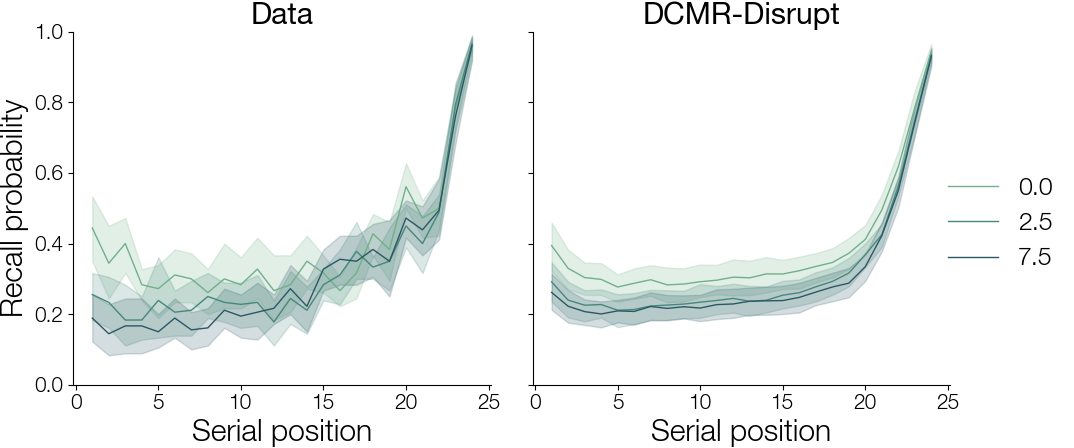

In [7]:
spc = data.groupby(['source', 'Distraction (s)'], sort=False).apply(fr.spc)
g = fr.plot_spc(spc, hue='Distraction (s)', col='source', palette=curve, height=5).add_legend().set_titles('{col_name}')
g.savefig(fig_dir / 'spc.pdf')

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


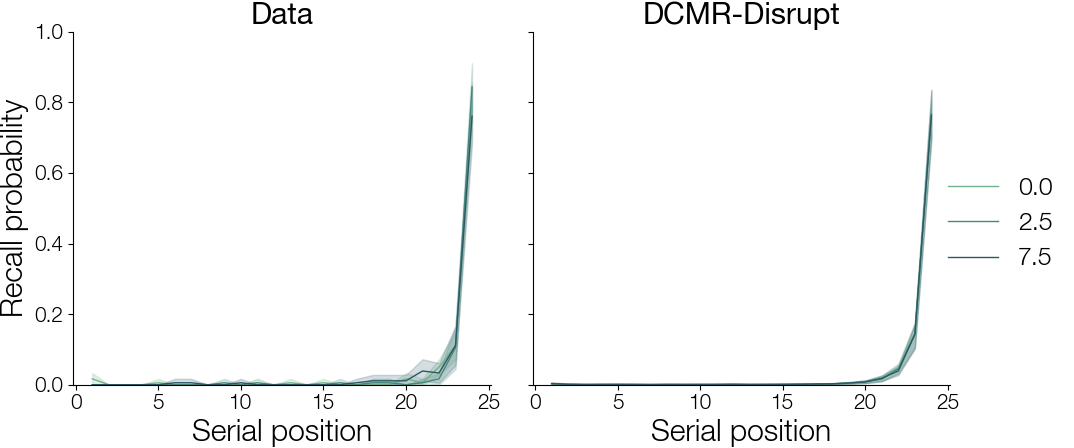

In [8]:
pfr = (
    data.groupby(['source', 'Distraction (s)'], sort=False)
    .apply(fr.pnr, include_groups=False)
    .query('output == 1')
)
g = fr.plot_spc(pfr, hue='Distraction (s)', col='source', palette=curve, height=5).add_legend().set_titles('{col_name}')
g.savefig(fig_dir / 'pfr.pdf')

In [9]:
kwargs = {'dark': dark, 'light': light, 'point_kws': {'size': 5}}

In [10]:
clust = (
    data.groupby(['source', 'Distraction (s)'])
    .apply(fr.category_clustering, category_key='category', include_groups=False)
)
clust.groupby(['source', 'Distraction (s)']).agg(['mean', 'sem'])

subject            lbc                 arc  \
                                mean  sem      mean       sem      mean   
source       Distraction (s)                                              
DCMR-Disrupt 0.0               205.9  1.1  2.000435  0.147399  0.463544   
             2.5               205.9  1.1  1.495000  0.115761  0.434912   
             7.5               205.9  1.1  1.434734  0.102333  0.439926   
Data         0.0               205.9  1.1  2.180676  0.138734  0.531257   
             2.5               205.9  1.1  1.422464  0.145531  0.408586   
             7.5               205.9  1.1  1.465459  0.164687  0.495812   

                                        
                                   sem  
source       Distraction (s)            
DCMR-Disrupt 0.0              0.012609  
             2.5              0.030093  
             7.5              0.026025  
Data         0.0              0.027473  
             2.5              0.049215  
             7.5              0.042237

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


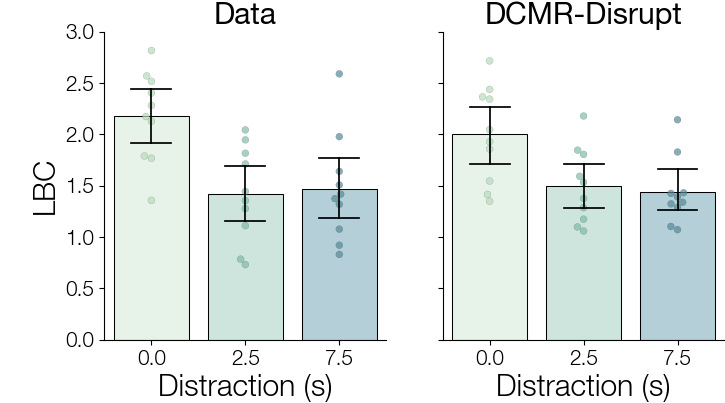

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
sb.plot_swarm_bar(clust.loc['Data'], x='Distraction (s)', y='lbc', hue='Distraction (s)', legend=False, ax=ax[0], **kwargs);
ax[0].set_ylabel('LBC')
ax[0].set_ylim(0, 3)
ax[0].set_xlabel('Distraction (s)')
ax[0].set_title('Data')
ax[0].tick_params(axis='x', labelsize='small')
sb.plot_swarm_bar(clust.loc['DCMR-Disrupt'], x='Distraction (s)', y='lbc', hue='Distraction (s)', legend=False, ax=ax[1], **kwargs);
ax[1].set_xlabel('Distraction (s)')
ax[1].set_title('DCMR-Disrupt')
ax[1].tick_params(axis='x', labelsize='small')
fig.savefig(fig_dir / 'lbc.pdf')

In [12]:
temp = data.groupby(['source', 'Distraction (s)']).apply(
    fr.lag_rank, test_key='category', test=lambda x, y: x == y, include_groups=False
)
temp.groupby(['source', 'Distraction (s)']).agg(['mean', 'sem'])

subject           rank          
                                mean  sem      mean       sem
source       Distraction (s)                                 
DCMR-Disrupt 0.0               205.9  1.1  0.669883  0.006676
             2.5               205.9  1.1  0.672927  0.013811
             7.5               205.9  1.1  0.685430  0.011632
Data         0.0               205.9  1.1  0.676020  0.008431
             2.5               205.9  1.1  0.664947  0.023335
             7.5               205.9  1.1  0.679256  0.014973

In [13]:
p = clust.loc['Data', 'lbc'].unstack().T
pg.ttest(p[0.0], p[2.5], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.176331,9,two-sided,0.002389,"[0.35, 1.17]",1.686451,19.854,0.996984


In [14]:
p = clust.loc['DCMR-Disrupt', 'lbc'].unstack().T
pg.ttest(p[0.0], p[2.5], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.836298,9,two-sided,0.003989,"[0.21, 0.8]",1.206032,13.04,0.922777


LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


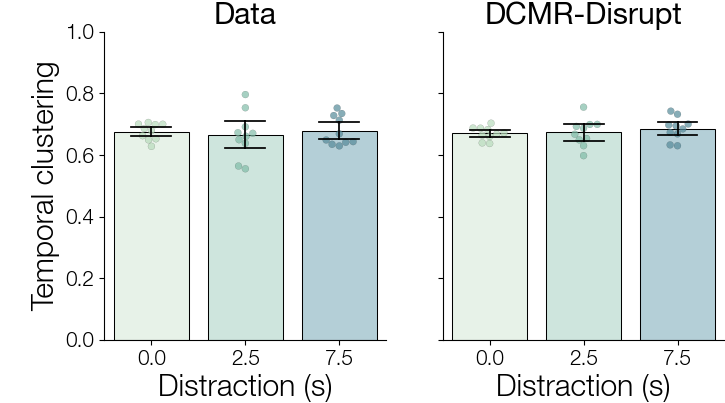

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
sb.plot_swarm_bar(temp.loc['Data'], x='Distraction (s)', y='rank', hue='Distraction (s)', legend=False, ax=ax[0], **kwargs);
ax[0].set_ylabel('Temporal clustering')
ax[0].set_xlabel('Distraction (s)')
ax[0].set_title('Data')
ax[0].tick_params(axis='x', labelsize='small')
ax[0].set_ylim(0, 1)
sb.plot_swarm_bar(temp.loc['DCMR-Disrupt'], x='Distraction (s)', y='rank', hue='Distraction (s)', legend=False, ax=ax[1], **kwargs);
ax[1].set_xlabel('Distraction (s)')
ax[1].set_title('DCMR-Disrupt')
ax[1].tick_params(axis='x', labelsize='small')
fig.savefig(fig_dir / 'tempclust.pdf')

In [16]:
p = temp.loc['Data', 'rank'].unstack().T
pg.ttest(p[0.0], p[2.5], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.491749,9,two-sided,0.634668,"[-0.04, 0.06]",0.199598,0.342,0.087504


In [17]:
p = temp.loc['DCMR-Disrupt', 'rank'].unstack().T
pg.ttest(p[0.0], p[2.5], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.219518,9,two-sided,0.831144,"[-0.03, 0.03]",0.088744,0.315,0.057309


In [18]:
table, raw = reports.create_model_table(fit_dir, models, model_names, model_comp=None)
table.to_latex(fig_dir / 'parameters_cdcatfr2.tex', escape=False)
table

,DCMR-Disrupt
$D_{FF}$,0.02 (0.01)
$\phi_s$,0.01 (0.00)
$\phi_d$,2.37 (0.64)
"$\beta_{\mathrm{enc},I}$",0.56 (0.02)
"$\beta_{\mathrm{enc},C}$",0.23 (0.10)
"$\beta_{\mathrm{enc},D}$",0.43 (0.14)
$\beta_{\mathrm{start}}$,0.87 (0.08)
"$\beta_{\mathrm{rec},I}$",0.79 (0.02)
$w_1$,0.95 (0.03)
$w_2$,0.08 (0.03)


In [19]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 9.2.0

cymr      : 0.13.0
platform  : 1.0.8
pingouin  : 0.5.5
pandas    : 2.2.3
sys       : 3.12.8 (main, Jan 22 2025, 16:41:29) [Clang 16.0.0 (clang-1600.0.26.3)]
seaborn   : 0.13.2
dcmr      : 1.0.0a0
swarmbar  : 0.1.0
psifr     : 0.9.3
matplotlib: 3.10.3
numpy     : 2.1.3

